## Receiver Anonymity Set Size over time
Starting with the number of all Receivers for all sources at timeslot 0

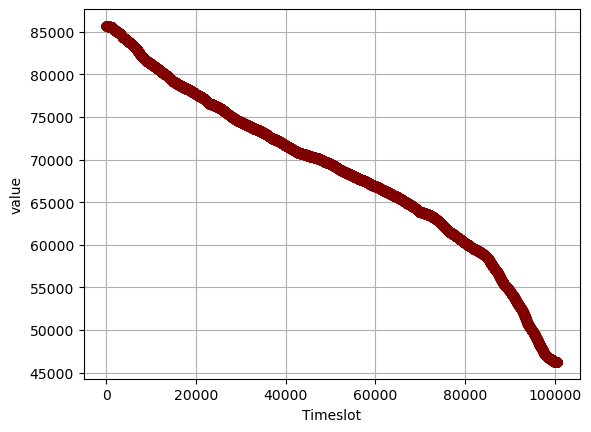

In [2]:
import matplotlib.pyplot as plt
import json

dictionary = json.load(open('map.json', 'r'))
xAxis = [int(key) for key, value in dictionary.items()]
yAxis = [int(value) for key, value in dictionary.items()]
fig = plt.figure()
plt.grid(True)

## LINE GRAPH 
plt.plot(xAxis,yAxis, color='maroon', marker='o')
plt.xlabel('Timeslot')
plt.ylabel('value')
plt.show()


# Deanomization

How much is the anonymity set reduced?

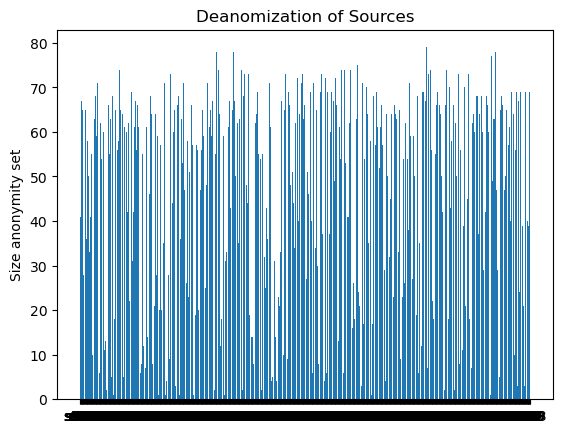

In [3]:
import matplotlib.pyplot as plt
import json

deanomization = json.load(open('deanomization.json', 'r'))

fig, ax = plt.subplots()

labels =  [value["source"] for value in deanomization]
counts = [value["remaining_anonymity_set"] for value in deanomization]

ax.bar(labels, counts)

ax.set_ylabel('Size anonymity set')
ax.set_title('Deanomization of Sources')

plt.show()

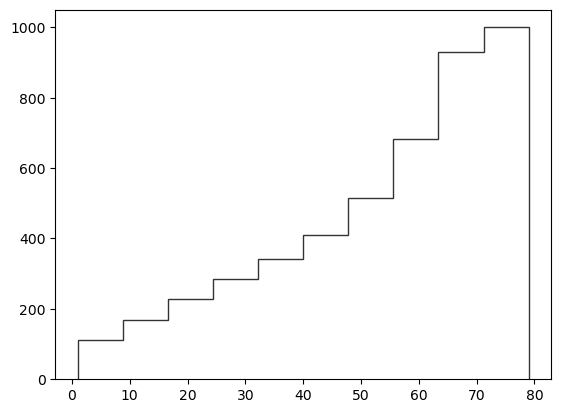

In [4]:
fig, ax = plt.subplots()

labels =  [value["source"] for value in deanomization]
counts = [value["remaining_anonymity_set"] for value in deanomization]


plt.hist(counts, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.show()

### After how many messages are Users deanomized?
The x axis groups sources based on the number of messages they sent
The line on the y axis indicates how many messages have been sent and the box plot shows when users sending a specfic amount of messages (x-axis) have been deanomized.

<function matplotlib.pyplot.show(close=None, block=None)>

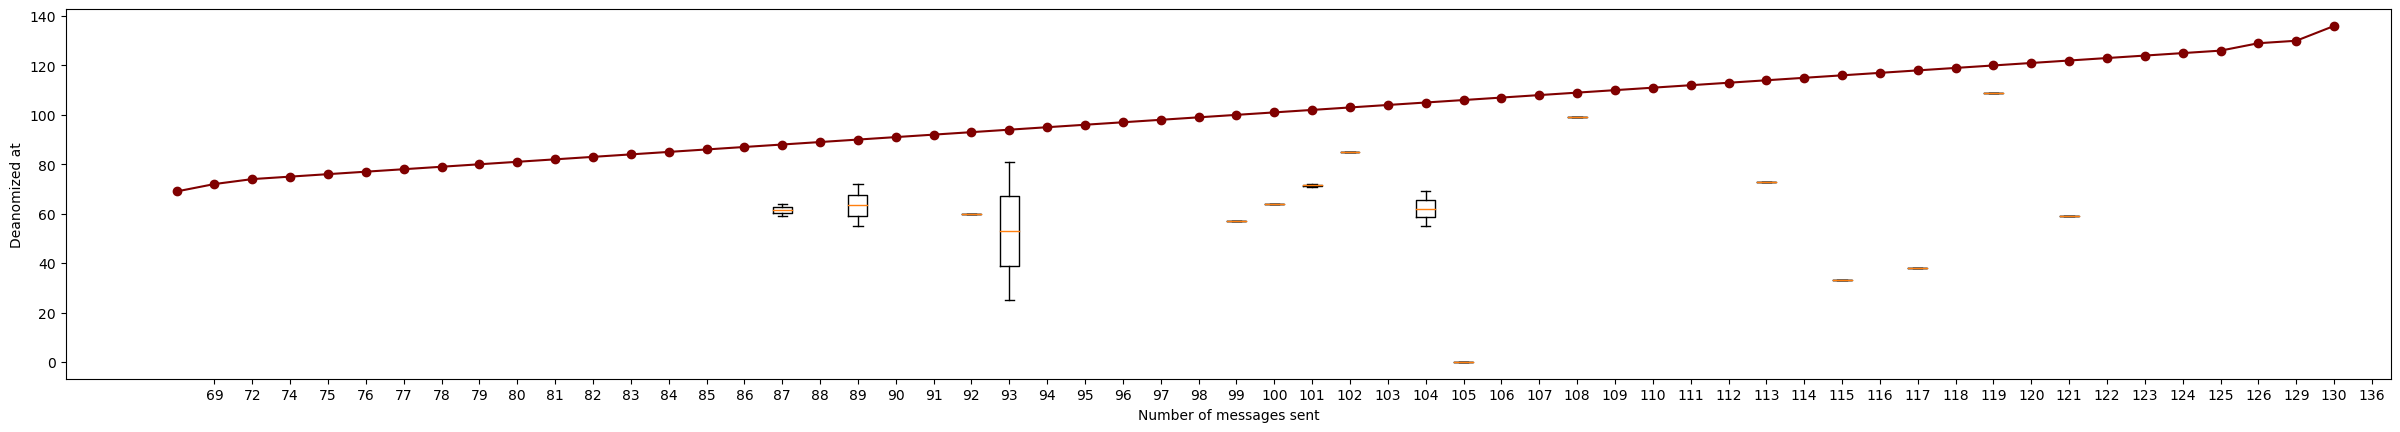

In [5]:
# Remove Duplicates from a Python list using a collections
from collections import OrderedDict


fig, ax = plt.subplots()
fig.set_figwidth(30)
labels =  [value["source"] for value in deanomization]

messages = [value["messages"] for value in deanomization]

deduplicated_messages = list(OrderedDict.fromkeys(messages))
deduplicated_messages.sort()
y = []
z = []
for message in deduplicated_messages: 
    x = []
    for dea in deanomization:
        if message == dea["messages"]:
            if dea["deanomized_at"] is not None: 
                x.append(dea["deanomized_at"])
    y.append(x)
    z.append(message)


plt.plot(deduplicated_messages, color='maroon', marker='o')
plt.xlabel('Number of messages sent')
plt.ylabel('Deanomized at')
ax.boxplot(y,labels = z)
plt.show

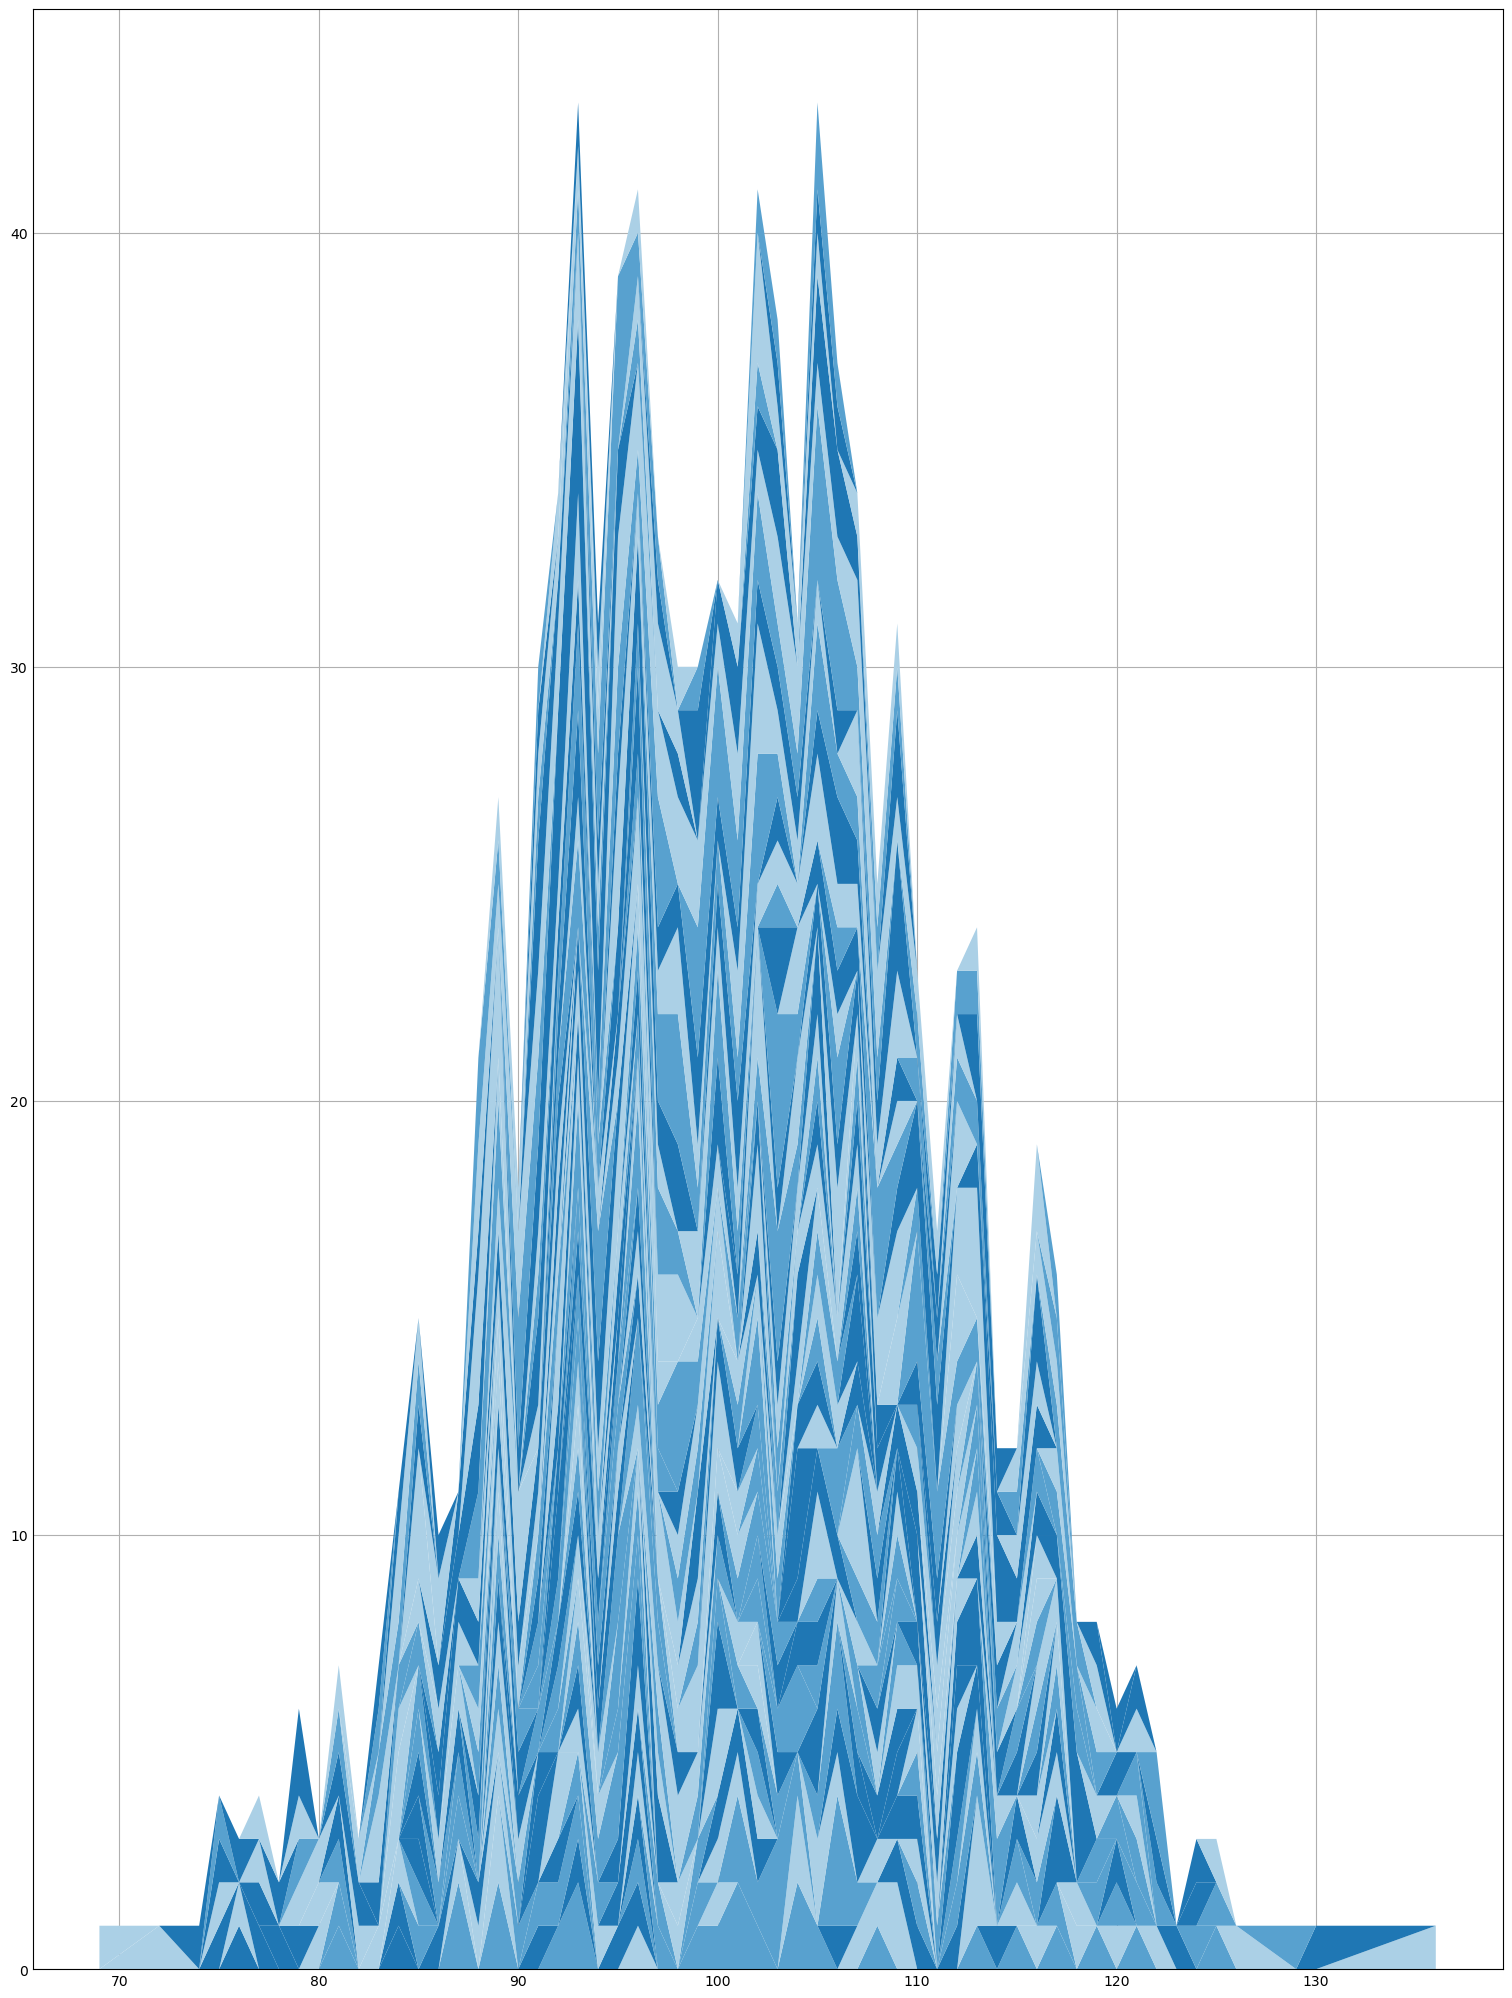

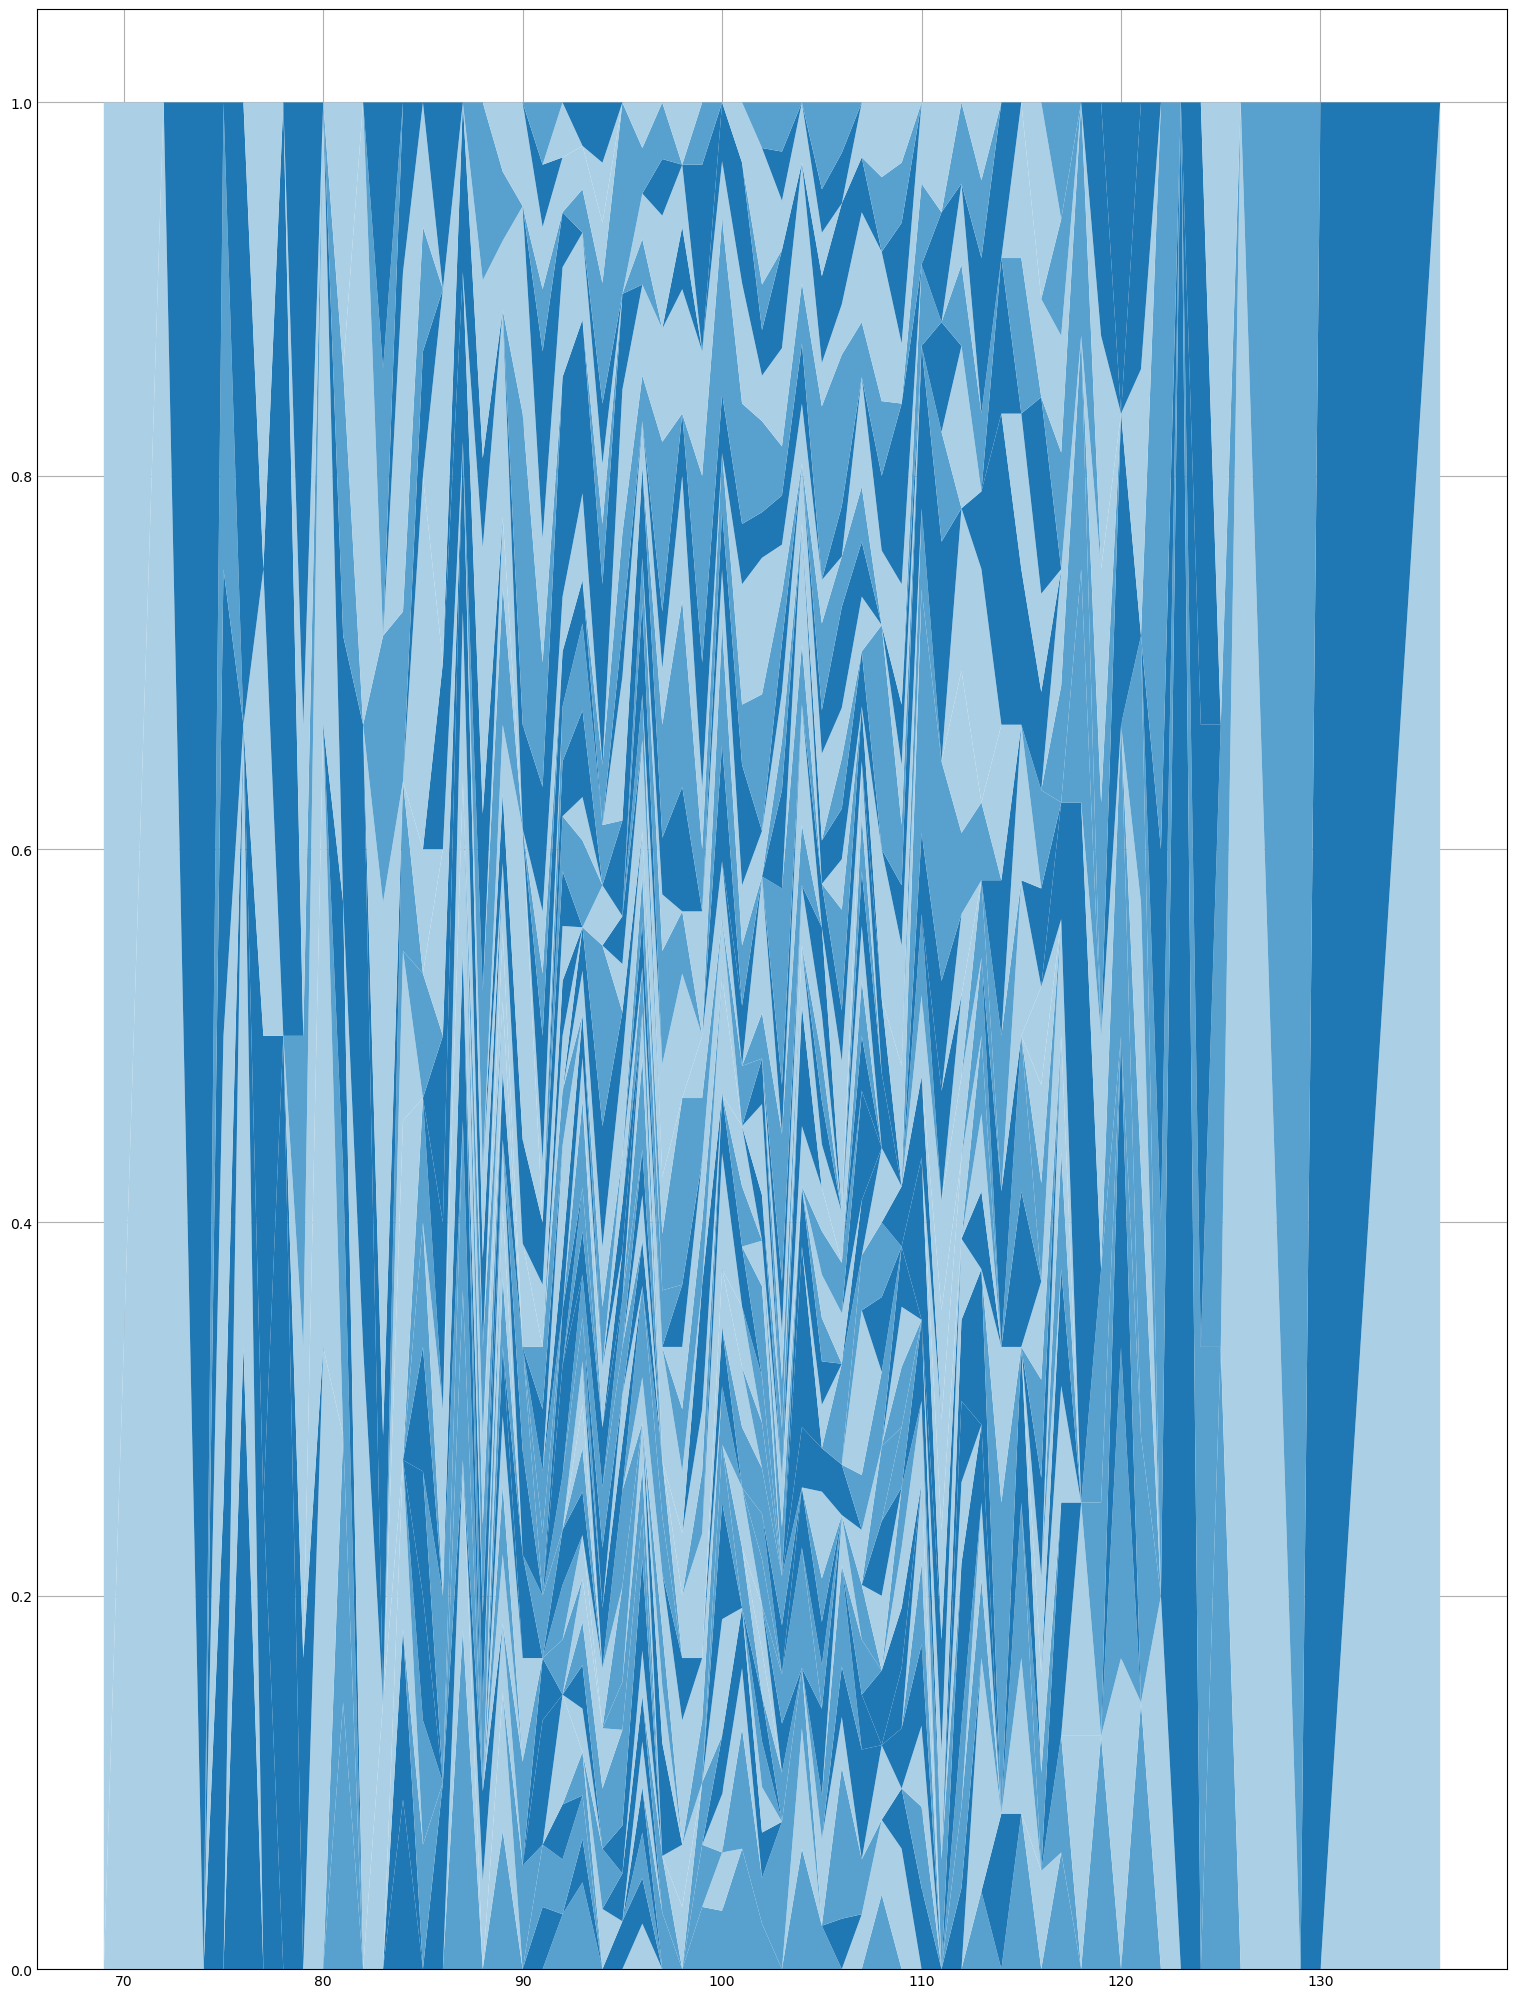

In [6]:
import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy as np
# Remove Duplicates from a Python list using a collections
from collections import OrderedDict

deanomization = json.load(open('deanomization.json', 'r'))
labels =  [value["source"] for value in deanomization]

messages = [value["messages"] for value in deanomization]

deduplicated_messages = list(OrderedDict.fromkeys(messages))
deduplicated_messages.sort()
sorted_dea = []
normed_dea = []
z = []
y = []


for message in deduplicated_messages: 
    x = []
    for dea in deanomization:
        if message == dea["messages"]: 
            x.append(dea["remaining_anonymity_set"])
    sorted_dea.append(x)


    
counted = []
normed_counted = []

for l in sorted_dea:
    c = Counter(l)
    counted.append(c)
    norm = {}
    total = sum(l)
    for k,v in c.items():
        norm[k]=  float(v)/sum(c.values())
    normed_counted.append(norm)

  
maximum = max(entry["remaining_anonymity_set"] for entry in deanomization)
x_min = min(entry["messages"] for entry in deanomization)
x_max = max(entry["messages"] for entry in deanomization)

normed_y = []
for j in range(maximum + 1): 
    x = [c.get(j, 0)   for c in counted]    
    y.append(x)
    x = [c.get(j, 0)   for c in normed_counted]
    normed_y.append(x)

    
plt.style.use('_mpl-gallery')

# make data

y_axis = np.vstack(y)
y_axis_normed = np.vstack(normed_y)

# plot
fig, ax = plt.subplots()
ax.stackplot(deduplicated_messages, y_axis)
fig.set_figwidth(15)
fig.set_figheight(20)

plt.show()

fig, ax = plt.subplots()
ax.stackplot(deduplicated_messages, y_axis_normed)
fig.set_figwidth(15)
fig.set_figheight(20)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy as np
# Remove Duplicates from a Python list using a collections
from collections import OrderedDict

deanomization = json.load(open('deanomization.json', 'r'))
messages = [value["messages"] for value in deanomization]

deduplicated_messages = list(OrderedDict.fromkeys(messages))
deduplicated_messages.sort()
sorted_dea = []
z = []
y = []


for message in deduplicated_messages: 
    x = []
    for dea in deanomization:
        if message == dea["messages"]: 
            x.append(dea["remaining_anonymity_set"])
    sorted_dea.append(x)


    
counted = []
normed_counted = []
maximum = max(entry["remaining_anonymity_set"] for entry in deanomization)
x_min = min(entry["messages"] for entry in deanomization)
x_max = max(entry["messages"] for entry in deanomization)


for l in sorted_dea:
    c = Counter(l)
    counted.append(c)
    norm = {}
    total = sum(l)
    for k,v in c.items():
        norm[k]=  float(v)/sum(c.values())
    normed_counted.append(norm)
    

values = []
for v in normed_counted:
    x = [v.get(i, 0)  for i in range(1,maximum+1)]
    values.append(x)
    

    
results = dict(zip(messages, values))

category_names = range(1,maximum+1)

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    fig.set_figwidth(30)
    fig.set_figheight(30)
    return fig, ax


survey(results, category_names)
plt.show()

RuntimeError: Unknown return type

<Figure size 3000x3000 with 1 Axes>